This project was to get a list of existing wework locations in london and plot those against 
average house prices in the area as to predict which of the exsting locations would prove he best investment 
for WeLive product, which offers dwellings. The reasoning ehind it being, with the property values rising when wework is 
paying legacy rent rates, pricing for WeLive would be the most favourable. The assumption is the areas that have seen the largest value spike in the last 20 years would likely continue to do so in foreseeable future.


In [1]:
# requests for fetching html of website
import requests

# Make the request to a url
r = requests.get('https://www.wework.com/l/london')

# Create soup from content of request
c = r.content

from bs4 import BeautifulSoup

soup = BeautifulSoup(c)

C:\Users\akostrzewa\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\akostrzewa\AppData\Local\Continuum\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [2]:
#panic install bits and bobs I had issues with previously
!pip install mpl_toolkits

!pip install msgpack-python

!python -m pip install wordcloud-1.4.1-cp37-cp37m-win_amd64

!pip install plotly

  Could not find a version that satisfies the requirement mpl_toolkits (from versions: )
No matching distribution found for mpl_toolkits
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Could not find a version that satisfies the requirement wordcloud-1.4.1-cp37-cp37m-win_amd64 (from versions: )
No matching distribution found for wordcloud-1.4.1-cp37-cp37m-win_amd64
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
#import bonanza in case I need any of the below, likely overkill

import matplotlib.pyplot as plt
import matplotlib
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
import re
import io
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

# from mpl_toolkits.basemap import Basemap
from matplotlib import animation, rc
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')

import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output
import folium 
from folium import plugins
from folium.plugins import HeatMap

In [4]:
#Scrape wework London locations off the website

ww_london = soup.find_all('div', attrs = {'class':"Text-eRQrfc bZlMnY", 'type':"copy3"})
ww_london

[<div class="Text-eRQrfc bZlMnY" type="copy3">2 Southbank Place London SE1 7NW</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">97 Hackney Rd London E2 8ET</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">The Bard, Shoreditch London EC2A 3EN</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">10 Devonshire Square London UK EC2M 4YP</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">51 Eastcheap London EC3M</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">70 Wilson Street London EC2A 2DB</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">207 Old Street London EC1V 9NR</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">120 Moorgate London EC2Y 9AL</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">1 Waterhouse Square London EC1N 2ST</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">The Hewitt, Shoreditch London EC2A</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">115 Mare Street London UK E8 4RU</div>,
 <div class="Text-eRQrfc bZlMnY" type="copy3">131 Finsbur

In [5]:
#make more legible

for location in ww_london:
    print(location.prettify())

<div class="Text-eRQrfc bZlMnY" type="copy3">
 2 Southbank Place London SE1 7NW
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 97 Hackney Rd London E2 8ET
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 The Bard, Shoreditch London EC2A 3EN
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 10 Devonshire Square London UK EC2M 4YP
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 51 Eastcheap London EC3M
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 70 Wilson Street London EC2A 2DB
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 207 Old Street London EC1V 9NR
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 120 Moorgate London EC2Y 9AL
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 1 Waterhouse Square London EC1N 2ST
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 The Hewitt, Shoreditch London EC2A
</div>

<div class="Text-eRQrfc bZlMnY" type="copy3">
 115 Mare Street London UK E8 4RU
</div>

<div class="Text-eRQrfc bZlMnY" typ

In [6]:
#bye-bye div tags

addresses = []
for location in ww_london:
    locations = location.contents[0]
    
    addresses.append(locations)
    print(locations)

2 Southbank Place London SE1 7NW
97 Hackney Rd London E2 8ET
The Bard, Shoreditch London EC2A 3EN
10 Devonshire Square London UK EC2M 4YP
51 Eastcheap London EC3M
70 Wilson Street London EC2A 2DB
207 Old Street London EC1V 9NR
120 Moorgate London EC2Y 9AL
1 Waterhouse Square London EC1N 2ST
The Hewitt, Shoreditch London EC2A
115 Mare Street London UK E8 4RU
131 Finsbury Pavement London EC2A 1NT
12 Hammersmith Grove London W6 7AP
1 Primrose Street London EC2A 2EX
Aldgate Tower 2 Leman Street London E1 8FA
14 Gray's Inn Road London WC1X 8HN
2 Eastbourne Terrace London W2 6LG
16 Great Chapel St London W1F 8FL
119 Marylebone Road London NW1 5PU
Shepherds Bush Road London W6 7NL
38 Chancery Lane London WC2A 1EN
41 Corsham Street London N1 6DR
1 St. Katharine's Way London E1W 1UN
30 Stamford Street London SE1 9PY
33 Queen St London EC4R 1AP
9 Devonshire Square 3rd Floor London EC2M 4YD
1 Fore Street Avenue London EC2Y 9DT
138 Holborn London EC1N 2SW
15 Bishopsgate London EC2N 3AR
71-91 Aldwy

In [7]:
#correct some of the postcodes - PLEASE NOTE: the list sequence changes daily or more often 
#the numbers used to call list elements below might have to be adjusted

addresses[34]='145 City Rd Hoxton London EC1V 1LP'
addresses[4]='51 Eastcheap London EC3M 1JP'
addresses[9]= 'The Hewitt, Shoreditch London EC2A 3EN'

In [8]:
addresses

['2 Southbank Place London SE1 7NW',
 '97 Hackney Rd London E2 8ET',
 'The Bard, Shoreditch London EC2A 3EN',
 '10 Devonshire Square London UK EC2M 4YP',
 '51 Eastcheap London EC3M 1JP',
 '70 Wilson Street London EC2A 2DB',
 '207 Old Street London EC1V 9NR',
 '120 Moorgate London EC2Y 9AL',
 '1 Waterhouse Square London EC1N 2ST',
 'The Hewitt, Shoreditch London EC2A 3EN',
 '115 Mare Street London UK E8 4RU',
 '131 Finsbury Pavement London EC2A 1NT',
 '12 Hammersmith Grove London W6 7AP',
 '1 Primrose Street London EC2A 2EX',
 'Aldgate Tower 2 Leman Street London E1 8FA',
 "14 Gray's Inn Road London WC1X 8HN",
 '2 Eastbourne Terrace London W2 6LG',
 '16 Great Chapel St London W1F 8FL',
 '119 Marylebone Road London NW1 5PU',
 'Shepherds Bush Road London W6 7NL',
 '38 Chancery Lane London WC2A 1EN',
 '41 Corsham Street London N1 6DR',
 "1 St. Katharine's Way London E1W 1UN",
 '30 Stamford Street London SE1 9PY',
 '33 Queen St London EC4R 1AP',
 '9 Devonshire Square 3rd Floor London EC2M 4

In [9]:
#extract just postcodes

london_postcodes=[]
for a in addresses:
    london_postcodes.append(a[-8:-4])

In [10]:
london_postcodes

[' SE1',
 'n E2',
 'EC2A',
 'EC2M',
 'EC3M',
 'EC2A',
 'EC1V',
 'EC2Y',
 'EC1N',
 'EC2A',
 'K E8',
 'EC2A',
 'n W6',
 'EC2A',
 'n E1',
 'WC1X',
 'n W2',
 ' W1F',
 ' NW1',
 'n W6',
 'WC2A',
 'n N1',
 ' E1W',
 ' SE1',
 'EC4R',
 'EC2M',
 'EC2Y',
 'EC1N',
 'EC2N',
 'WC2B',
 ' SE1',
 'EC2A',
 ' W1F',
 'n N1',
 'EC1V',
 'WC2B',
 'don ',
 'EC2M']

In [11]:
#remove spaces

from re import sub

districts = []

for postcode in london_postcodes:
    print(sub(r'\s+','', string=postcode))
    districts.append(sub(r'\s+','', string=postcode))

      

SE1
nE2
EC2A
EC2M
EC3M
EC2A
EC1V
EC2Y
EC1N
EC2A
KE8
EC2A
nW6
EC2A
nE1
WC1X
nW2
W1F
NW1
nW6
WC2A
nN1
E1W
SE1
EC4R
EC2M
EC2Y
EC1N
EC2N
WC2B
SE1
EC2A
W1F
nN1
EC1V
WC2B
don
EC2M


In [12]:
districts

['SE1',
 'nE2',
 'EC2A',
 'EC2M',
 'EC3M',
 'EC2A',
 'EC1V',
 'EC2Y',
 'EC1N',
 'EC2A',
 'KE8',
 'EC2A',
 'nW6',
 'EC2A',
 'nE1',
 'WC1X',
 'nW2',
 'W1F',
 'NW1',
 'nW6',
 'WC2A',
 'nN1',
 'E1W',
 'SE1',
 'EC4R',
 'EC2M',
 'EC2Y',
 'EC1N',
 'EC2N',
 'WC2B',
 'SE1',
 'EC2A',
 'W1F',
 'nN1',
 'EC1V',
 'WC2B',
 'don',
 'EC2M']

In [13]:
#remove lowercase letters

p_d = []

for district in districts:
    print(sub(r'[a-z]','', string=district))
    p_d.append(sub(r'[a-z]','', string=district))
    


SE1
E2
EC2A
EC2M
EC3M
EC2A
EC1V
EC2Y
EC1N
EC2A
KE8
EC2A
W6
EC2A
E1
WC1X
W2
W1F
NW1
W6
WC2A
N1
E1W
SE1
EC4R
EC2M
EC2Y
EC1N
EC2N
WC2B
SE1
EC2A
W1F
N1
EC1V
WC2B

EC2M


In [14]:
p_d

['SE1',
 'E2',
 'EC2A',
 'EC2M',
 'EC3M',
 'EC2A',
 'EC1V',
 'EC2Y',
 'EC1N',
 'EC2A',
 'KE8',
 'EC2A',
 'W6',
 'EC2A',
 'E1',
 'WC1X',
 'W2',
 'W1F',
 'NW1',
 'W6',
 'WC2A',
 'N1',
 'E1W',
 'SE1',
 'EC4R',
 'EC2M',
 'EC2Y',
 'EC1N',
 'EC2N',
 'WC2B',
 'SE1',
 'EC2A',
 'W1F',
 'N1',
 'EC1V',
 'WC2B',
 '',
 'EC2M']

In [15]:
#put list in df

postcodes_ww=pd.DataFrame(p_d)
postcodes_ww.columns=['Postcode']

postcodes_ww

,Postcode
0,SE1
1,E2
2,EC2A
3,EC2M
4,EC3M
5,EC2A
6,EC1V
7,EC2Y
8,EC1N
9,EC2A


In [16]:
#second list into df

ww_add = pd.DataFrame(addresses)
ww_add.columns=['Address']
ww_add

,Address
0,2 Southbank Place London SE1 7NW
1,97 Hackney Rd London E2 8ET
2,"The Bard, Shoreditch London EC2A 3EN"
3,10 Devonshire Square London UK EC2M 4YP
4,51 Eastcheap London EC3M 1JP
5,70 Wilson Street London EC2A 2DB
6,207 Old Street London EC1V 9NR
7,120 Moorgate London EC2Y 9AL
8,1 Waterhouse Square London EC1N 2ST
9,"The Hewitt, Shoreditch London EC2A 3EN"


In [17]:
london_addresses = pd.merge(ww_add, postcodes_ww, left_index=True, right_index=True)

In [18]:
london_addresses.rename(columns={'0':'Postcode'})

london_addresses

,Address,Postcode
0,2 Southbank Place London SE1 7NW,SE1
1,97 Hackney Rd London E2 8ET,E2
2,"The Bard, Shoreditch London EC2A 3EN",EC2A
3,10 Devonshire Square London UK EC2M 4YP,EC2M
4,51 Eastcheap London EC3M 1JP,EC3M
5,70 Wilson Street London EC2A 2DB,EC2A
6,207 Old Street London EC1V 9NR,EC1V
7,120 Moorgate London EC2Y 9AL,EC2Y
8,1 Waterhouse Square London EC1N 2ST,EC1N
9,"The Hewitt, Shoreditch London EC2A 3EN",EC2A


In [19]:
#check number of unique values

london_addresses.nunique()

Address     38
Postcode    22
dtype: int64

In [21]:
#import land registry info from HM Land Registry open data

housing=pd.read_csv('land-registry-house-prices-postcode-district.csv')
housing

,Postcode_District,Year,Measure,Value
0,BR1,1995,Median,75458.0
1,BR2,1995,Median,86258.0
2,BR3,1995,Median,77983.0
3,BR4,1995,Median,93816.0
4,BR5,1995,Median,71218.0
5,BR6,1995,Median,97629.0
6,BR7,1995,Median,106432.0
7,CR0,1995,Median,57436.0
8,CR2,1995,Median,78258.0
9,CR3,1995,Median,81444.0


In [22]:
#selecting rows with Median values

housing=housing[housing['Measure'].str.match('Median')]

In [23]:
#joining dwo dataframes for the ultimate df

housing_joined = pd.merge(housing,london_addresses, left_on='Postcode_District', right_on='Postcode')

In [24]:
#boom

housing_joined

,Postcode_District,Year,Measure,Value,Address,Postcode
0,E1,1995,Median,62887.0,Aldgate Tower 2 Leman Street London E1 8FA,E1
1,E1,1996,Median,65937.0,Aldgate Tower 2 Leman Street London E1 8FA,E1
2,E1,1997,Median,87052.0,Aldgate Tower 2 Leman Street London E1 8FA,E1
3,E1,1998,Median,106521.0,Aldgate Tower 2 Leman Street London E1 8FA,E1
4,E1,1999,Median,126915.0,Aldgate Tower 2 Leman Street London E1 8FA,E1
5,E1,2000,Median,154346.0,Aldgate Tower 2 Leman Street London E1 8FA,E1
6,E1,2001,Median,165803.0,Aldgate Tower 2 Leman Street London E1 8FA,E1
7,E1,2002,Median,189758.0,Aldgate Tower 2 Leman Street London E1 8FA,E1
8,E1,2003,Median,193879.0,Aldgate Tower 2 Leman Street London E1 8FA,E1
9,E1,2004,Median,205440.0,Aldgate Tower 2 Leman Street London E1 8FA,E1


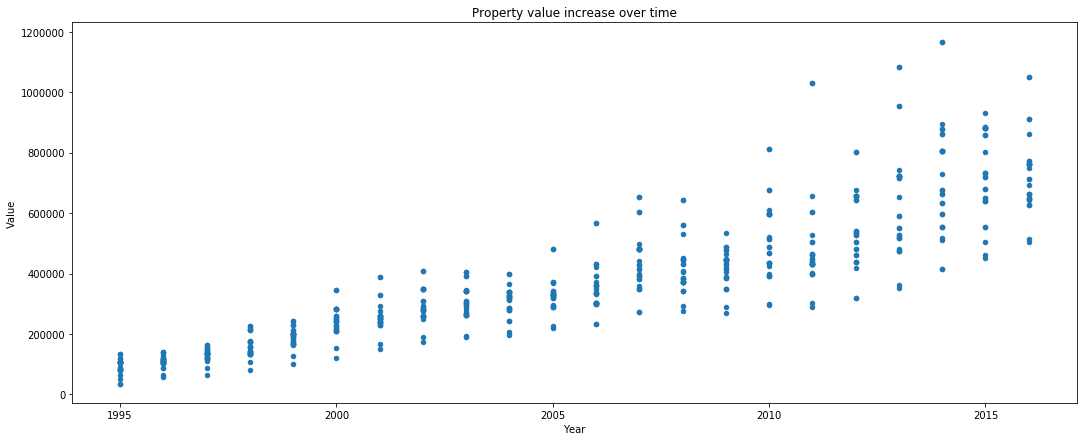

In [25]:
#groupby and plot value trend

fig, ax = plt.subplots()
year_and_value=housing_joined.groupby('Address').plot(x='Year', y='Value', title='Property value increase over time', kind='scatter', figsize=(18,7),  ax=ax,)

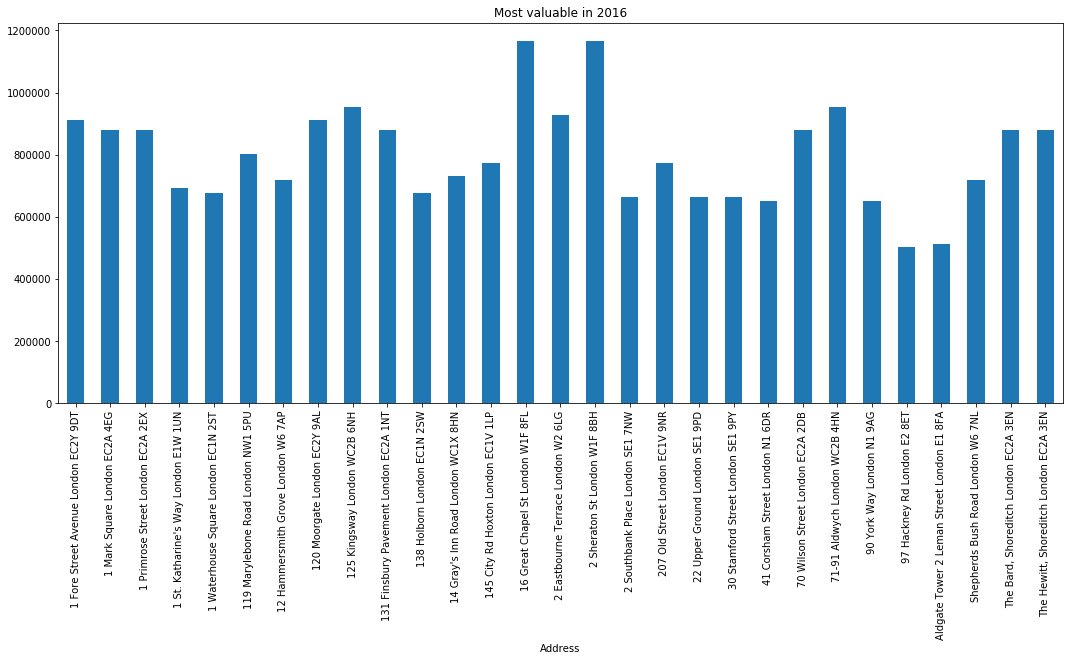

In [26]:
#viz no1, bar chart to see most valuable addresses in 2016


fig, ax = plt.subplots()


year_and_value=housing_joined.groupby('Address').max().reset_index().plot(x='Address', y='Value', title='Most valuable in 2016', kind='bar', figsize=(18,7),  ax=ax, legend=False)




In [27]:

a=housing_joined.groupby('Address').min().reset_index()
b=housing_joined.groupby('Address').max().reset_index()

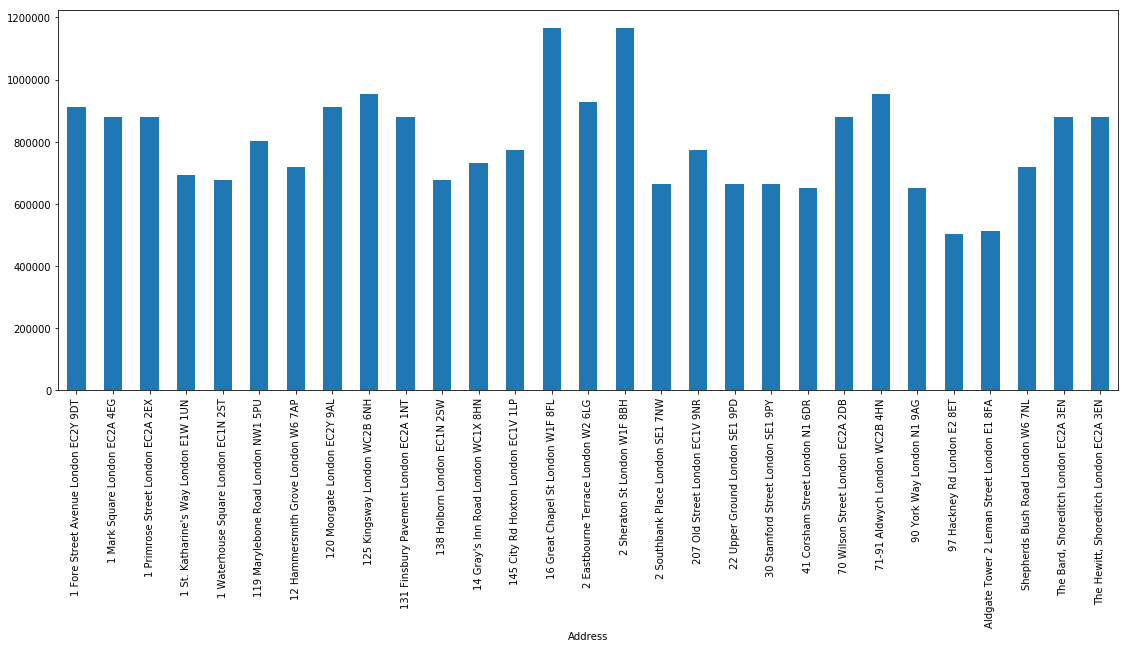

In [28]:
ax = plt.subplot()
a.plot(x=b['Address'], y='Value',  kind='bar', figsize=(19,7),  ax=ax, legend=False)
b.plot(x='Address', y='Value',  kind='bar', figsize=(19,7), ax=ax, legend=False)

plt.show()


In [29]:
value_low=a['Value']
value_high=b['Value']


In [30]:
import plotly 

plotly.offline.init_notebook_mode(connected=True)


trace0 = go.Bar(
    x= a['Address'],
    y=value_low,
    name='2016',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=a['Address'],
    y=value_high,
    name='2014',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='angled-text-bar')

SystemError: <built-in method __deepcopy__ of numpy.ndarray object at 0x000002287BE91940> returned a result with an error set

In [31]:
a['Value']

0     107326.0
1      82360.0
2      82360.0
3     105636.0
4      35707.0
5     118329.0
6     105415.0
7     107326.0
8     108062.0
9      82360.0
10     35707.0
11    107361.0
12    106988.0
13    120708.0
14    122144.0
15    120708.0
16     87372.0
17    106988.0
18     87372.0
19     87372.0
20    108950.0
21     82360.0
22    108062.0
23    108950.0
24     52663.0
25     62887.0
26    105415.0
27     82360.0
28     82360.0
Name: Value, dtype: float64

In [32]:
a['Address']

0           1 Fore Street Avenue London EC2Y 9DT
1                  1 Mark Square London EC2A 4EG
2              1 Primrose Street London EC2A 2EX
3           1 St. Katharine's Way London E1W 1UN
4            1 Waterhouse Square London EC1N 2ST
5             119 Marylebone Road London NW1 5PU
6             12 Hammersmith Grove London W6 7AP
7                   120 Moorgate London EC2Y 9AL
8                   125 Kingsway London WC2B 6NH
9          131 Finsbury Pavement London EC2A 1NT
10                   138 Holborn London EC1N 2SW
11            14 Gray's Inn Road London WC1X 8HN
12            145 City Rd Hoxton London EC1V 1LP
13             16 Great Chapel St London W1F 8FL
14            2 Eastbourne Terrace London W2 6LG
15                  2 Sheraton St London W1F 8BH
16              2 Southbank Place London SE1 7NW
17                207 Old Street London EC1V 9NR
18                22 Upper Ground London SE1 9PD
19             30 Stamford Street London SE1 9PY
20               41 

In [33]:
import plotly 

plotly.offline.init_notebook_mode(connected=True)

trace0 = {'type' : 'bar', 'x': b['Address'], 'y' :a['Value']}

plotly.offline.iplot([trace0])

SystemError: <built-in method __deepcopy__ of numpy.ndarray object at 0x000002287CCE23F0> returned a result with an error set

In [34]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
print (cf.__version__)

0.13.0


In [ ]:
#plotly doesn't seem to work still

#import cufflinks as cf

#df= housing_joined.groupby('Address').max().reset_index().iplot(kind='scatter', filename='cufflinks/cf-simple-line')

#df.iplot(kind='scatter', filename='cufflinks/cf-simple-line')

The result of the project isn't conclusive as I am missing data on current rents wework is paying on these properties and there is no guarantee what will happen to the market as Brexit happens. Unfortunately I ran out of time to produce quality visualisations for this project, especially since whatever I do, plotly just won't do what I want it to do (work). There's possibly better/simpler ways of cleaning the data I imported.